In [3]:
import math
import os
import re
import altair as alt
import numpy as np
import pandas as pd
import scipy.stats
import yaml
import neutcurve
import scipy.stats
print(f"Using `neutcurve` version {neutcurve.__version__}")
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# allow more rows for Altair
_ = alt.data_transformers.disable_max_rows()

#import altair themes from /data/custom_analyses_data/theme.py and enable
import theme
alt.themes.register('main_theme', theme.main_theme)
alt.themes.enable('main_theme')
plt.rcParams['svg.fonttype'] = 'none' #from bernadeta, for correct font svg output

from pathlib import Path

repo_root = Path.cwd().parent
os.chdir(repo_root)
print(os.getcwd())
#print(os.listdir("raw_plate_reader"))

Using `neutcurve` version 2.1.0
/fh/fast/bloom_j/computational_notebooks/tmcmahon/2024/02_RSV/RSV_evolution_neut


In [4]:
df_879 = pd.read_csv('01_data/other/cell_line_fractinfect_87_9.csv')
df_pool = pd.read_csv('01_data/other/cell_line_fractinfect_pooledsera.csv')
df_nirs = pd.read_csv('01_data/other/cell_line_fractinfect_Nirsevimab.csv')

In [5]:
fits_879 = neutcurve.curvefits.CurveFits(
            data=df_879,
            fixbottom=0,

            #max_sera_per_subplot=3
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

In [6]:
fits_pool = neutcurve.curvefits.CurveFits(
            data=df_pool,
            fixbottom=0,

            #max_sera_per_subplot=3
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

In [7]:
fits_nirs = neutcurve.curvefits.CurveFits(
            data=df_nirs,
            fixbottom=0,

            #max_sera_per_subplot=3
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

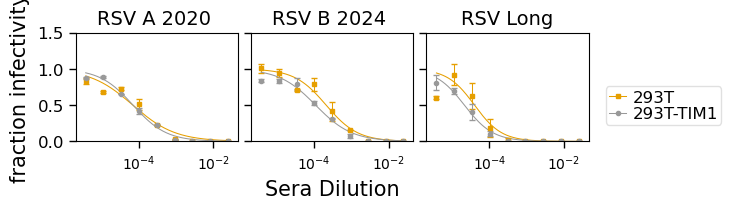

In [8]:
# Define updated color mapping for specific viruses
custom_colors = {
    "293T": "#e69f00",  # orange to match titer
    "293T-TIM1": "#999999" # grey
    #"RSV Long": "#B87AA4"
}

# Assign colors in the order of viruses appearing in the filtered data
filtered_sera = [
    "293T", "293T-TIM1"
]

# Generate color list
colors = [custom_colors[v] for v in filtered_sera]

# Define unique markers to ensure differentiation
markers = ['s','o']

# Generate the filtered plots with updated colors
fig, axes = fits_879.plotViruses(
    xlabel='Sera Dilution',
    colors=colors,
    markers=markers,
    draw_in_bounds=True,
    ncol=3,
    sharex=False,
    linewidth=0.75,  # Set line width for the curves
    markersize=3  # Reduce marker size
)

# Set figure size
fig.set_size_inches(6, 2)  # Adjust width and height

# Apply formatting to each subplot
for ax in axes.flat:
    if ax:  # Ensure it's a valid axis
        ax.set_ylim(0, 1.5)  # Force y-axis from 0 to 1
        ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=4))  # Keep 3 ticks on Y
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))  # Format Y labels to 1 decimal place
        
        # Remove forced 3 x-axis ticks (let Matplotlib handle it)
        #ax.set_xticks([])  # Remove manually set ticks
        #ax.xaxis.set_major_locator(ticker.AutoLocator())  # Default tick locations

        ax.tick_params(axis='x', which='both', labelsize=10)  # Ensure X tick labels are visible

        # --- Manually Adjust Markers (Set Black Edge) ---
        for path in ax.collections:
            #path.set_edgecolor('black')  # Set marker border to black
            path.set_linewidth(0.75)  # Thin border around points

        # --- Keep Error Bars Thin (Without Making Them Borders) ---
        for line in ax.get_lines():
            if "errorbar" in str(line):  # Identify error bars
                line.set_linewidth(0.75)  # Make error bars thin, not bold

# Set font to Helvetica (or fallback to sans-serif)
#plt.rcParams['font.family'] = ['Helvetica', 'sans-serif']


fig.savefig('03_output/plots/CellLine_Rep1_87_9.svg', bbox_inches='tight', dpi=100)

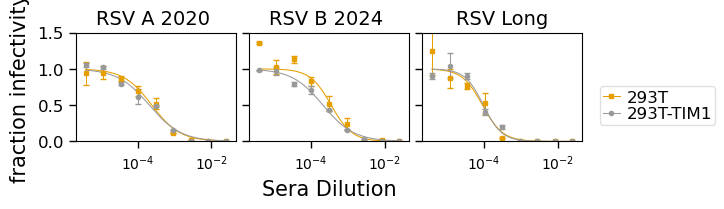

In [9]:
# Define updated color mapping for specific viruses
custom_colors = {
    "293T": "#e69f00",  # orange to match titer
    "293T-TIM1": "#999999" # grey
    #"RSV Long": "#B87AA4"
}

# Assign colors in the order of viruses appearing in the filtered data
filtered_sera = [
    "293T", "293T-TIM1"
]

# Generate color list
colors = [custom_colors[v] for v in filtered_sera]

# Define unique markers to ensure differentiation
markers = ['s','o']

# Generate the filtered plots with updated colors
fig, axes = fits_pool.plotViruses(
    xlabel='Sera Dilution',
    colors=colors,
    markers=markers,
    draw_in_bounds=True,
    ncol=3,
    sharex=False,
    linewidth=0.75,  # Set line width for the curves
    markersize=3  # Reduce marker size
)

# Set figure size
fig.set_size_inches(6, 2)  # Adjust width and height

# Apply formatting to each subplot
for ax in axes.flat:
    if ax:  # Ensure it's a valid axis
        ax.set_ylim(0, 1.5)  # Force y-axis from 0 to 1
        ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=4))  # Keep 3 ticks on Y
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))  # Format Y labels to 1 decimal place
        
        # Remove forced 3 x-axis ticks (let Matplotlib handle it)
        #ax.set_xticks([])  # Remove manually set ticks
        #ax.xaxis.set_major_locator(ticker.AutoLocator())  # Default tick locations

        ax.tick_params(axis='x', which='both', labelsize=10)  # Ensure X tick labels are visible

        # --- Manually Adjust Markers (Set Black Edge) ---
        for path in ax.collections:
            #path.set_edgecolor('black')  # Set marker border to black
            path.set_linewidth(0.75)  # Thin border around points

        # --- Keep Error Bars Thin (Without Making Them Borders) ---
        for line in ax.get_lines():
            if "errorbar" in str(line):  # Identify error bars
                line.set_linewidth(0.75)  # Make error bars thin, not bold

# Set font to Helvetica (or fallback to sans-serif)
#plt.rcParams['font.family'] = ['Helvetica', 'sans-serif']



fig.savefig('03_output/plots/CellLine_Rep1_pooledsera.svg', bbox_inches='tight',dpi=100)

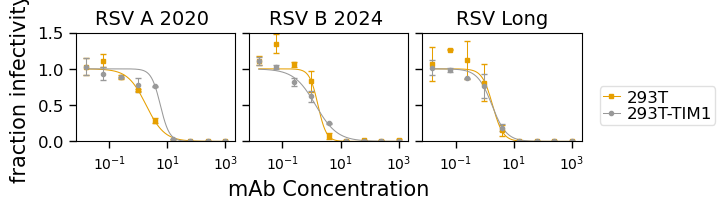

In [10]:
# Define updated color mapping for specific viruses
custom_colors = {
    "293T": "#e69f00",  # Orange
    "293T-TIM1": "#999999"  # Grey
}

# Assign colors in the order of viruses appearing in the filtered data
filtered_sera = ["293T", "293T-TIM1"]

# Generate color list
colors = [custom_colors[v] for v in filtered_sera]

# Define unique markers to ensure differentiation
markers = ['s', 'o']

# Generate the filtered plots with updated colors
fig, axes = fits_nirs.plotViruses(
    xlabel='mAb Concentration',
    colors=colors,
    markers=markers,
    draw_in_bounds=True,
    ncol=3,
    sharex=False,
    linewidth=0.75,  # Set line width for the curves
    markersize=3  # Reduce marker size
)

# Set figure size
fig.set_size_inches(6, 2)  # Adjust width and height

# Apply formatting to each subplot
for ax in axes.flat:
    if ax:  # Ensure it's a valid axis
        ax.set_ylim(0, 1.5)  # Force y-axis from 0 to 1
        ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=4))  # Keep 3 ticks on Y
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))  # Format Y labels to 1 decimal place
        
        # Remove forced 3 x-axis ticks (let Matplotlib handle it)
        #ax.set_xticks([])  # Remove manually set ticks
        #ax.xaxis.set_major_locator(ticker.AutoLocator())  # Default tick locations

        ax.tick_params(axis='x', which='both', labelsize=10)  # Ensure X tick labels are visible

        # --- Manually Adjust Markers (Set Black Edge) ---
        for path in ax.collections:
            #path.set_edgecolor('black')  # Set marker border to black
            path.set_linewidth(0.75)  # Thin border around points

        # --- Keep Error Bars Thin (Without Making Them Borders) ---
        for line in ax.get_lines():
            if "errorbar" in str(line):  # Identify error bars
                line.set_linewidth(0.75)  # Make error bars thin, not bold

# Set font to Helvetica (or fallback to sans-serif)
#plt.rcParams['font.family'] = ['Helvetica', 'sans-serif']

# Save figure with high resolution
fig.savefig('03_output/plots/CellLine_Rep1_nirsevimab.svg', bbox_inches='tight', dpi=100)


In [11]:
print(fits_nirs.df.head())

  serum        virus replicate  concentration  fraction infectivity  stderr
0  293T  RSV A 2020          1       1000.000              0.004104     NaN
1  293T  RSV A 2020          1        250.000              0.001967     NaN
2  293T  RSV A 2020          1         62.500              0.002037     NaN
3  293T  RSV A 2020          1         15.620              0.004768     NaN
4  293T  RSV A 2020          1          3.906              0.250400     NaN
